In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
pd.options.display.max_columns = 200
pd.options.display.max_rows = 100
from sklearn.metrics.cluster import adjusted_rand_score
sns.set_theme(style="whitegrid")

In [2]:
data_ord_1 = pd.read_csv('data_ord_1.csv')
data_ord_2 = pd.read_csv('data_ord_2.csv')
data_ord_3 = pd.read_csv('data_ord_3.csv')
data_ord_4 = pd.read_csv('data_ord_4.csv')
data_ord_5 = pd.read_csv('data_ord_5.csv')
data_ord_1

,customer_unique_id,n_achats,fright_value,price,total_price,n_article,recent,frequence
0,0000f46a3911fa3c0805444483337064,1,17.22,69.00,86.22,1.0,358,358.0
1,0000f6ccb0745a6a4b88665a16c9f078,1,17.63,25.99,43.62,1.0,142,142.0
2,0004aac84e0df4da2b147fca70cf8255,1,16.89,180.00,196.89,1.0,109,109.0
3,00053a61a98854899e70ed204dd4bafe,1,37.18,382.00,419.18,2.0,3,3.0
4,0005e1862207bf6ccc02e4228effd9a0,1,15.12,135.00,150.12,1.0,364,364.0
...,...,...,...,...,...,...,...,...
58240,fffbf87b7a1a6fa8b03f081c5f51a201,1,18.32,149.00,167.32,1.0,66,66.0
58241,fffcf5a5ff07b0908bd4e2dbc735a684,1,497.42,1570.00,2067.42,2.0,268,268.0
58242,fffea47cd6d3cc0a88bd621562a9d061,1,19.69,64.89,84.58,1.0,83,83.0
58243,ffff371b4d645b6ecea244b27531430a,1,22.56,89.90,112.46,1.0,389,389.0


In [3]:
data_ord_1.dropna(subset=['total_price'],inplace=True)
data_ord_1

,customer_unique_id,n_achats,fright_value,price,total_price,n_article,recent,frequence
0,0000f46a3911fa3c0805444483337064,1,17.22,69.00,86.22,1.0,358,358.0
1,0000f6ccb0745a6a4b88665a16c9f078,1,17.63,25.99,43.62,1.0,142,142.0
2,0004aac84e0df4da2b147fca70cf8255,1,16.89,180.00,196.89,1.0,109,109.0
3,00053a61a98854899e70ed204dd4bafe,1,37.18,382.00,419.18,2.0,3,3.0
4,0005e1862207bf6ccc02e4228effd9a0,1,15.12,135.00,150.12,1.0,364,364.0
...,...,...,...,...,...,...,...,...
58240,fffbf87b7a1a6fa8b03f081c5f51a201,1,18.32,149.00,167.32,1.0,66,66.0
58241,fffcf5a5ff07b0908bd4e2dbc735a684,1,497.42,1570.00,2067.42,2.0,268,268.0
58242,fffea47cd6d3cc0a88bd621562a9d061,1,19.69,64.89,84.58,1.0,83,83.0
58243,ffff371b4d645b6ecea244b27531430a,1,22.56,89.90,112.46,1.0,389,389.0


In [4]:
data1=data_ord_1[['n_achats','recent','frequence','total_price']]
data2=data_ord_2[['n_achats','recent','frequence','total_price']]
data3=data_ord_3[['n_achats','recent','frequence','total_price']]
data4=data_ord_4[['n_achats','recent','frequence','total_price']]
data5=data_ord_5[['n_achats','recent','frequence','total_price']]

In [5]:
from sklearn import preprocessing, cluster, metrics
scaler=preprocessing.StandardScaler()
scaler.fit(data1)
X_norm1=pd.DataFrame(scaler.transform(data1),columns = data1.columns)
X_norm2=pd.DataFrame(scaler.transform(data2),columns = data1.columns)
X_norm3=pd.DataFrame(scaler.transform(data3),columns = data1.columns)
X_norm4=pd.DataFrame(scaler.transform(data4),columns = data1.columns)
X_norm5=pd.DataFrame(scaler.transform(data5),columns = data1.columns)

In [6]:
cls1=cluster.KMeans(n_clusters=4,init='random')
cls1.fit(X_norm1)

KMeans(init='random', n_clusters=4)

In [27]:
data_1_cls=data_ord_1[['customer_unique_id']]
data_1_cls['label']=cls1.labels_
data_1_cls
ari=[1]

/var/folders/rk/19mhn17506g7mynj9hbtw82h0000gn/T/ipykernel_2809/1710040120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_cls['label']=cls1.labels_


In [8]:
data_2_cls=data_ord_2[['customer_unique_id']]

In [9]:
data_2_cls['label']= cls1.predict(X_norm2)

/var/folders/rk/19mhn17506g7mynj9hbtw82h0000gn/T/ipykernel_2809/2227507588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_cls['label']= cls1.predict(X_norm2)


In [10]:
data_2_cls

,customer_unique_id,label
0,0000f46a3911fa3c0805444483337064,3
1,0000f6ccb0745a6a4b88665a16c9f078,1
2,0004aac84e0df4da2b147fca70cf8255,1
3,00053a61a98854899e70ed204dd4bafe,1
4,0005e1862207bf6ccc02e4228effd9a0,3
...,...,...
61590,fffbf87b7a1a6fa8b03f081c5f51a201,1
61591,fffcf5a5ff07b0908bd4e2dbc735a684,0
61592,fffea47cd6d3cc0a88bd621562a9d061,1
61593,ffff371b4d645b6ecea244b27531430a,3


In [11]:
df = pd.merge(data_1_cls, data_2_cls, on='customer_unique_id', suffixes=['_1', '_2'])
df

,customer_unique_id,label_1,label_2
0,0000f46a3911fa3c0805444483337064,3,3
1,0000f6ccb0745a6a4b88665a16c9f078,1,1
2,0004aac84e0df4da2b147fca70cf8255,1,1
3,00053a61a98854899e70ed204dd4bafe,1,1
4,0005e1862207bf6ccc02e4228effd9a0,3,3
...,...,...,...
58236,fffbf87b7a1a6fa8b03f081c5f51a201,1,1
58237,fffcf5a5ff07b0908bd4e2dbc735a684,0,0
58238,fffea47cd6d3cc0a88bd621562a9d061,1,1
58239,ffff371b4d645b6ecea244b27531430a,3,3


In [28]:
ari.append(adjusted_rand_score(df['label_1'], df['label_2']))
adjusted_rand_score(df['label_1'], df['label_2'])

0.8745224458390455

In [29]:
data_3_cls=data_ord_3[['customer_unique_id']]
data_3_cls['label']= cls1.predict(X_norm3)
df2 = pd.merge(data_1_cls, data_3_cls, on='customer_unique_id', suffixes=['_1', '_2'])
ari.append(adjusted_rand_score(df2['label_1'], df2['label_2']))
adjusted_rand_score(df2['label_1'], df2['label_2'])

/var/folders/rk/19mhn17506g7mynj9hbtw82h0000gn/T/ipykernel_2809/665261869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3_cls['label']= cls1.predict(X_norm3)


0.7535070442404913

In [30]:
data_4_cls=data_ord_4[['customer_unique_id']]
data_4_cls['label']= cls1.predict(X_norm4)
df2 = pd.merge(data_1_cls, data_4_cls, on='customer_unique_id', suffixes=['_1', '_2'])
ari.append(adjusted_rand_score(df2['label_1'], df2['label_2']))
adjusted_rand_score(df2['label_1'], df2['label_2'])

/var/folders/rk/19mhn17506g7mynj9hbtw82h0000gn/T/ipykernel_2809/2506795852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4_cls['label']= cls1.predict(X_norm4)


0.6368390286768604

Au delà de 45 jours on pred de la performence, 

In [31]:
ari

[1, 0.8745224458390455, 0.7535070442404913, 0.6368390286768604]

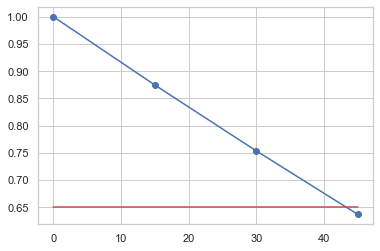

In [33]:
plt.plot(range(0,46,15),ari, marker='o')
plt.plot([0,45],[0.90,0.90],'k')
plt.plot([0,45],[0.8,0.8],'r')
plt.plot([0,45],[0.65,0.65],'r')